In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

training.columns
test.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [3]:
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
print("Training missing data")
print(training.isna().sum())
print("Test missing data")
print(test.isna().sum())

Training missing data
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Test missing data
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
training.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

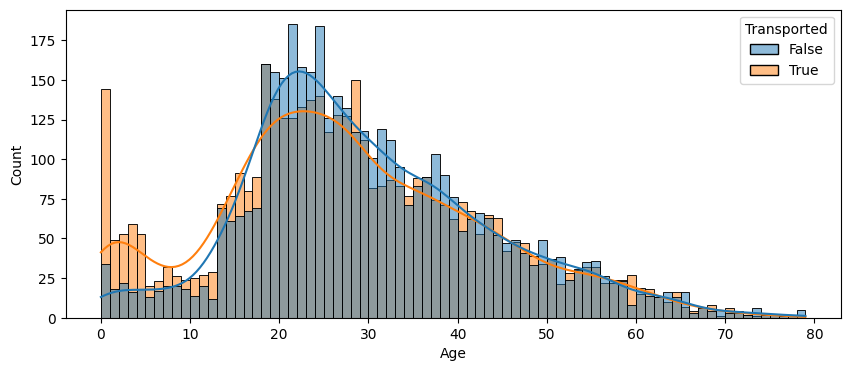

In [6]:
plt.figure(figsize=(10,4))

sns.histplot(data=training, x='Age', hue='Transported', binwidth=1, kde=True)

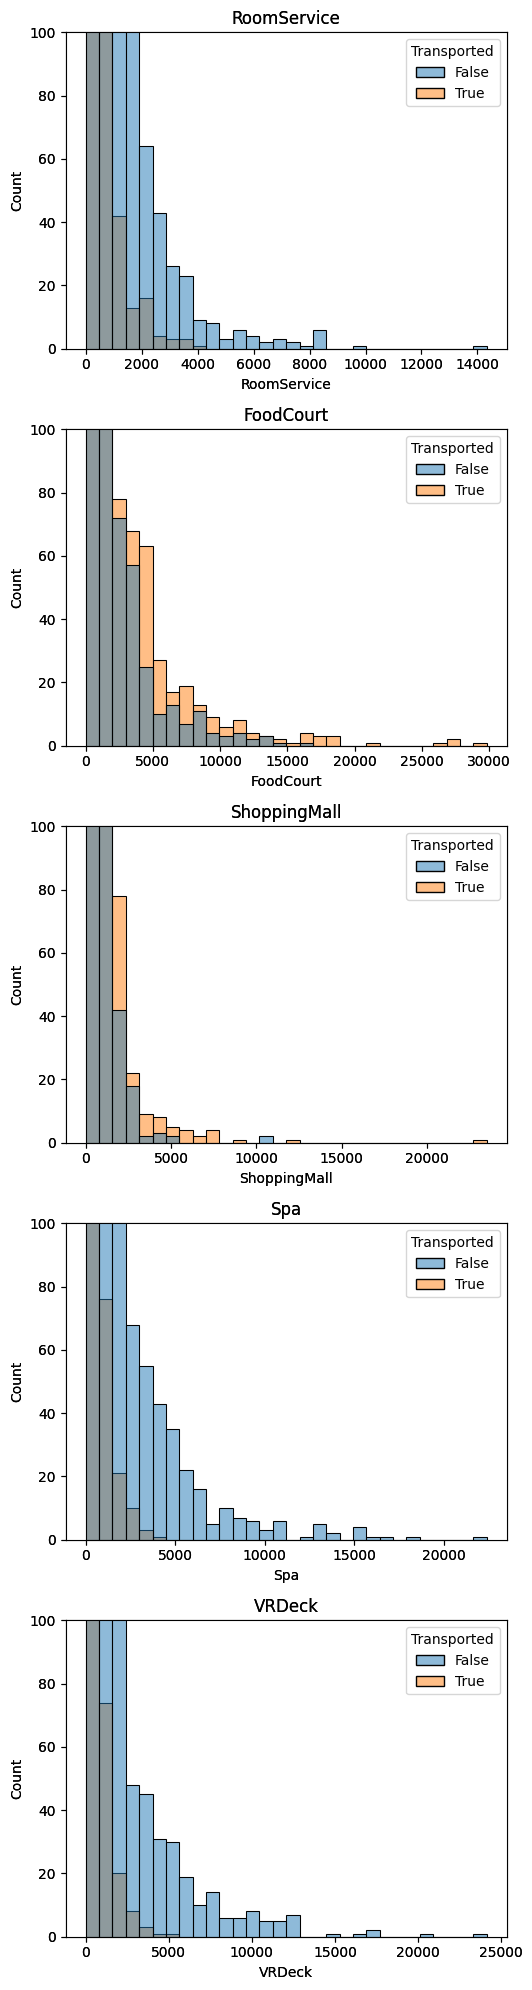

In [7]:
exp_features = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_features):
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=training, x= var_name, axes=ax, bins=30, kde=False, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)

    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=training, x= var_name, axes=ax, bins=30, kde=False, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()


In [8]:
training['Total_exp']=training[exp_features].sum(axis=1)
training['Exp']=np.where(training['Total_exp']==0, 0,1)

test['Total_exp']=test[exp_features].sum(axis=1)
test['Exp']=np.where(test['Total_exp']==0, 0,1)



<function matplotlib.pyplot.show(close=None, block=None)>

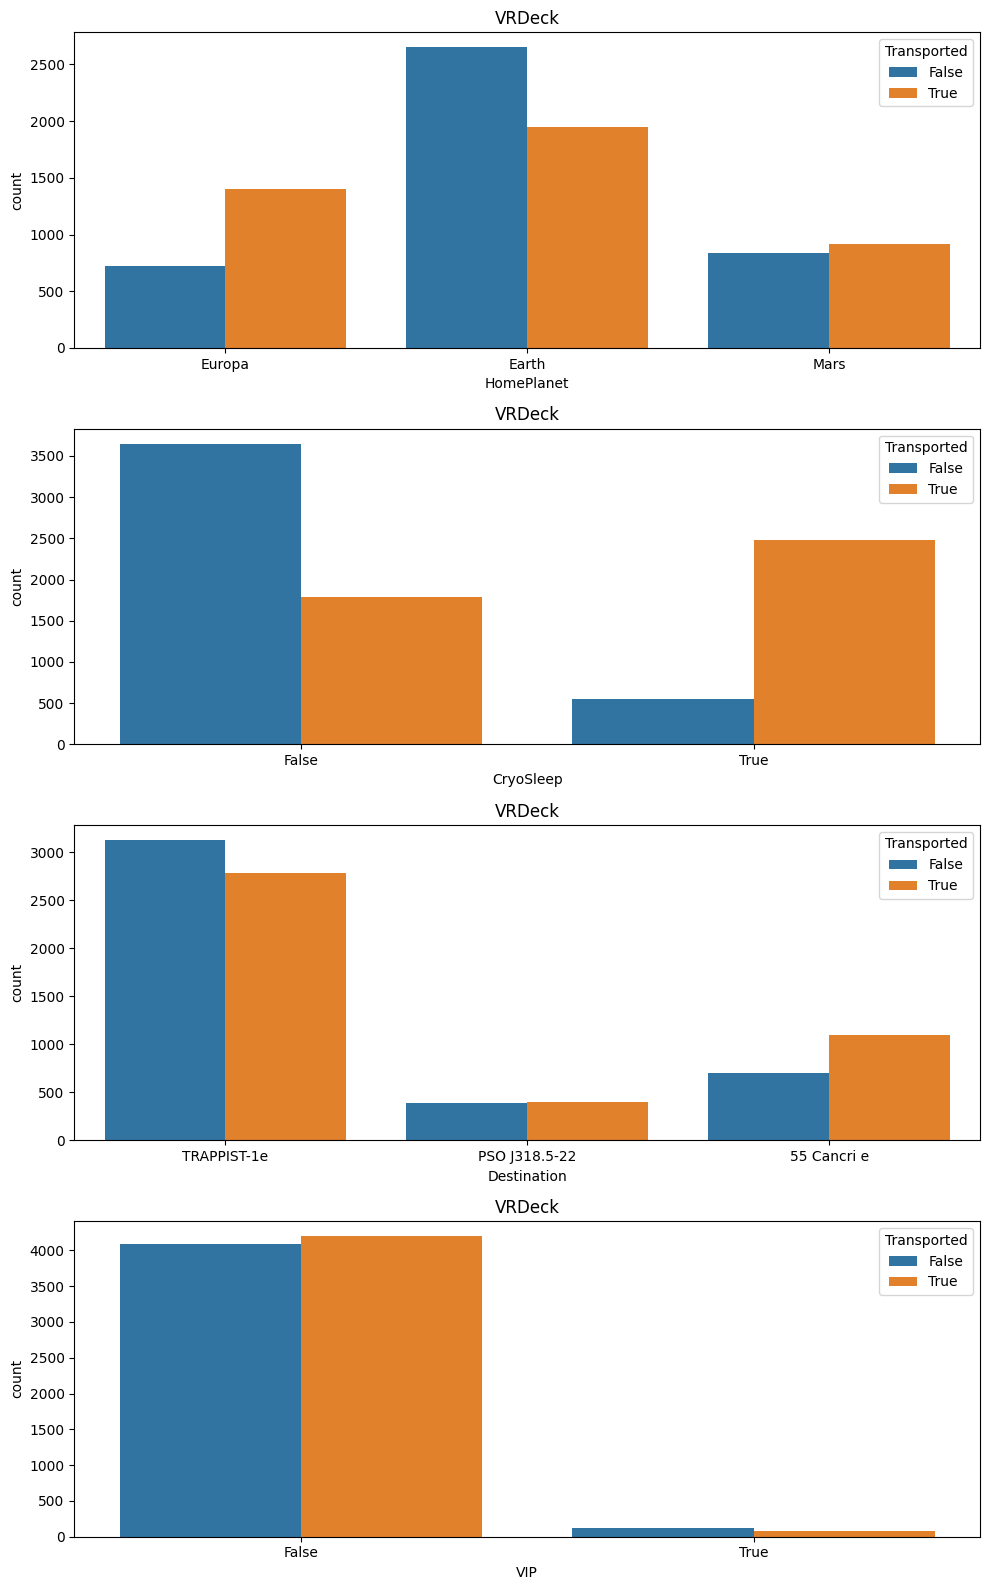

In [9]:
cat_features=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,16))
for i, var_names in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=training, x=var_names, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show

In [10]:
qual_features=['PassengerId', 'Cabin', 'Name']
training[qual_features].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


<function matplotlib.pyplot.show(close=None, block=None)>

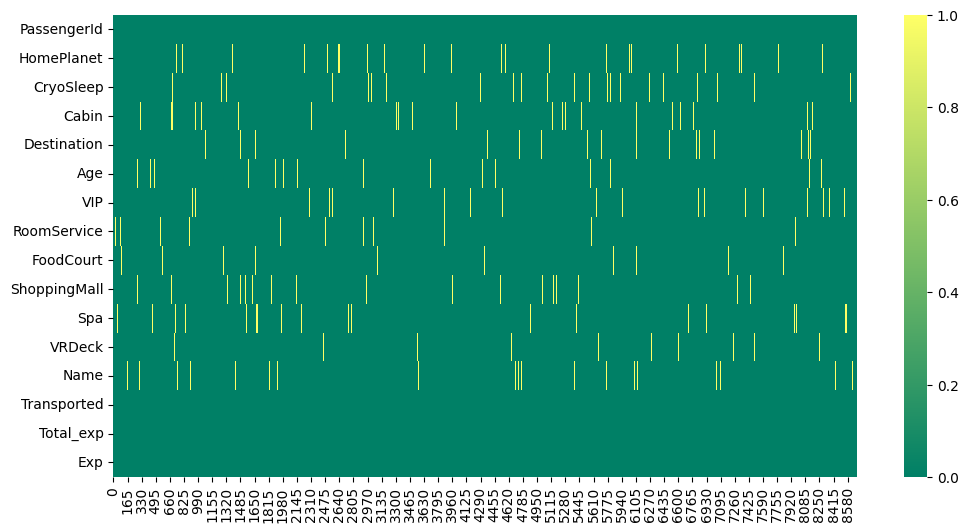

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(training.isna().T, cmap ='summer')
plt.show

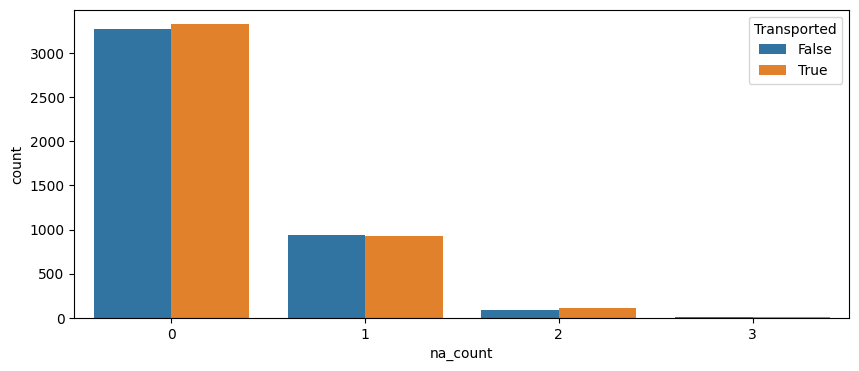

In [12]:
training['na_count']=training.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=training, x='na_count', hue='Transported')
plt.show
training.drop('na_count', axis=1, inplace=True)

In [13]:
training['Age'].fillna(training['Age'].median, inplace=True)
test['Age'].fillna(test['Age'].median, inplace=True)

training[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].mode()

,HomePlanet,CryoSleep,Destination,VIP
0,Earth,False,TRAPPIST-1e,False


In [14]:
training['HomePlanet'].fillna('Earth', inplace=True)
test['HomePlanet'].fillna('Earth', inplace=True)

training['CryoSleep'].fillna('False', inplace=True)
test['CryoSleep'].fillna('False', inplace=True)

training['Destination'].fillna('TRAPPIST-1e', inplace=True)
test['Destination'].fillna('TRAPPIST-1e', inplace=True)

training['VIP'].fillna('False', inplace=True)
test['VIP'].fillna('False', inplace=True)

In [20]:
for col in exp_features:
    training.loc[training[col].isna(),col]=0
    test.loc[test[col].isna(),col]=0

training['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

training['Name'].fillna('No Name', inplace=True)
test['Name'].fillna('No Name', inplace=True)

In [31]:
training['Age_group'] = np.nan
# training.loc[training['Age']<=18,'Age_group']='Age_0_18'
# training.loc[(training['Age']>18) & (training['Age']<=36),'Age_group']='Age_18_36'
# training.loc[(training['Age']>36) & (training['Age']<=54),'Age_group']='Age_36_54'
# training.loc[training['Age']>54,'Age_group']='Age_54+'

# test['Age_group'] = np.nan
# test.loc[test['Age']<=18,'Age_group']='Age_0_18'
# test.loc[(test['Age']>18) & (test['Age']<=36),'Age_group']='Age_18_36'
# test.loc[(test['Age']>36) & (test['Age']<=54),'Age_group']='Age_36_54'
# test.loc[test['Age']>54,'Age_group']='Age_54+'

# plt.figure(figsize=(10,6))
# g=sns.countplot(data=training, x='Age_Group', hue='Transported')
# plt.show
training.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age              object
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Total_exp       float64
Exp               int32
Age_group       float64
dtype: object